## **Analysis of SVD embeddings**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from google.colab import drive

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the emb_list.txt file in Google Drive
filename = '/content/drive/MyDrive/emb_list.txt'


Mounted at /content/drive


# Top-10 word vectors

In [9]:
# Read the first 1000 lines of the file
with open(filename, 'r') as f:
  lines = [line.rstrip() for line in f.readlines()[:100]]


In [10]:
# Parse the lines to extract words and vectors
word_list = []
vector_list = []
for line in lines:
  word, vector = line.split(': ')
  word_list.append(word)
  vector = np.array(vector.strip('[]').split(', '), dtype=float)
  vector_list.append(vector)


In [11]:
# Convert the vectors list to a numpy array
vectors = np.array(vector_list)

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=0)
vectors_tsne = tsne.fit_transform(vectors)


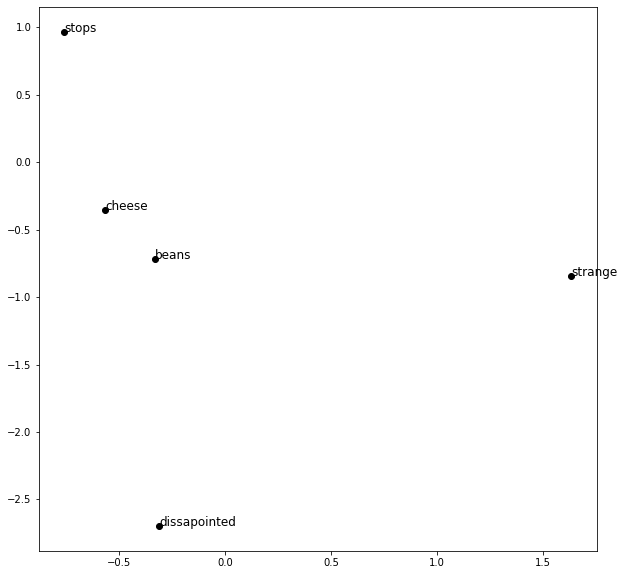

In [12]:
words_to_plot = ['beans', 'stops', 'dissapointed', 'cheese', 'strange']
top_n = 10
fig, ax = plt.subplots(figsize=(10, 10))
for i, word in enumerate(word_list):
  if word in words_to_plot:
    x, y = vectors_tsne[i, :]
    ax.scatter(x, y, marker='o', color='black')
    ax.annotate(word, xy=(x, y), fontsize=12)
    if np.sum(np.abs(vectors[i])) > 0 and word not in words_to_plot:
      dist = np.dot(vectors[i], vectors[words_to_plot].T)
      closest_words = np.argsort(dist)[::-1][:top_n]
      for j in closest_words:
        x_similar, y_similar = vectors_tsne[j, :]
        ax.plot([x, x_similar], [y, y_similar], color='gray')
plt.show()


# Closest words for ‘titanic’

In [13]:
emb_list = {}
with open('/content/drive/MyDrive/emb_list.txt', 'r') as f:
    for line in f.readlines():
        line = line.strip().split(': ')
        word = line[0]
        embedding = [float(val) for val in line[1][1:-1].split(', ')]
        emb_list[word] = embedding


In [15]:
# Find the top 10 closest words for 'titanic'
target_word = 'titanic'
target_embedding = np.array(emb_list[target_word])

distances = {}
for word, embedding in emb_list.items():
    if word == target_word:
        continue
    embedding = np.array(embedding)
    distance = np.linalg.norm(target_embedding - embedding)
    distances[word] = distance

# Sort the distances dictionary by value
sorted_distances = sorted(distances.items(), key=lambda x: x[1])

# Print the top 10 closest words
for i in range(10):
    print(sorted_distances[i])




('iceni', 0.03196894623687502)
('whore', 0.03294454577612742)
('angst', 0.033924717440678216)
('attract', 0.034573321436051116)
('blanket', 0.03503606164599751)
('zech', 0.035079804828640544)
('lauderdale', 0.03515372877729961)
('fertility', 0.03519384007627757)
('pile', 0.0352186783488721)
('diaries', 0.03526002499871007)


# Closest words for 'titanic' in pre-trained word2vec embeddings 

In [1]:
# Import the gensim library and download the pre-trained word2vec model
import gensim.downloader as api
model = api.load("word2vec-google-news-300")


[=================================================-] 100.0% 1662.0/1662.8MB downloaded


In [2]:
similar_words = model.most_similar('titanic', topn=10)
for word, similarity in similar_words:
    print(word, similarity)


epic 0.600616455078125
colossal 0.5896502137184143
gargantuan 0.5718227028846741
titanic_proportions 0.5610266923904419
titantic 0.5592556595802307
monumental 0.5530510544776917
monstrous 0.5457675457000732
epic_proportions 0.5437003970146179
gigantic 0.5176911950111389
mighty 0.5088781118392944
